In [1]:
from game import RandomPlayer, PassivePlayer, MinimaxPlayer, AlphaBetaPlayer, MonteCarloPlayer
from heuristic import DualBallReachableHeuristic, BallReachableHeuristic, DualBallDistanceHeuristic
from game import BoardState, GameSimulator, Rules
from util import GameRunner
import random
import itertools
import numpy as np
from copy import deepcopy
from test_bayes import *
import matplotlib.pyplot as plt

In [25]:
from test_bayes import *

In [2]:
def test_1_obs_lengths_infer_state():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(1,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 100
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            final_estimate = infer_last_state_from_seq(obs_seq=obs_seq)
            final_gt = gt_seq[len(gt_seq)-1][0]
            num_diff = get_diff(final_estimate,final_gt)
            avg += (12 - num_diff) / 12
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_1s, avg_accuracy_1s = test_1_obs_lengths_infer_state()
# plt.plot(obs_lens_1s, avg_accuracy_1s)

1 2 3 4 5 6 7 8 9 10 12 14 16 18 20 22 24 26 28 30 34 38 42 46 50 54 58 62 66 70 78 86 94 102 110 118 126 134 142 150 158 166 174 182 190 198 

In [ ]:
# Evaluates average accuracy over sequences of varying lengths
def test_1_obs_lengths_infer_actions():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(2,10,1),range(10,30,2),range(30,70,4),range(70,200,8))) # start from 2, no actions for 1 obs
    n_samples = 5
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            actions = infer_actions_from_seq(obs_seq=obs_seq)
            correct = 0
            for i in range(len(actions)):
                if actions[i] == gt_seq[i][1]:
                    correct += 1
            correct /= len(actions)
            avg += correct
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_1a, avg_accuracy_1a = test_1_obs_lengths_infer_actions()
# plt.plot(obs_lens_1a, avg_accuracy_1a)

In [ ]:
def test_2_init_dist_infer_state():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(1,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 100
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            final_estimate = infer_last_state_from_seq(obs_seq=obs_seq,init_dist="dirac_delta")
            final_gt = gt_seq[len(gt_seq)-1][0]
            num_diff = get_diff(final_estimate,final_gt)
            avg += (12 - num_diff) / 12
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_2s, avg_accuracy_2s = test_2_init_dist_infer_state()
# plt.plot(obs_lens_2s, avg_accuracy_2s)

In [ ]:
def test_2_init_dist_infer_actions():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(2,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 5
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            actions = infer_actions_from_seq(obs_seq=obs_seq,init_dist="dirac_delta")
            correct = 0
            for i in range(len(actions)):
                if actions[i] == gt_seq[i][1]:
                    correct += 1
            correct /= len(actions)
            avg += correct
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)
    
obs_lens_2a, avg_accuracy_2a = test_2_init_dist_infer_actions()
# plt.plot(obs_lens_2a, avg_accuracy_2a)

In [ ]:
def test_3_select_val_infer_state():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(1,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 100
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            final_estimate = infer_last_state_from_seq(obs_seq=obs_seq,select_dist_val="sample")
            final_gt = gt_seq[len(gt_seq)-1][0]
            num_diff = get_diff(final_estimate,final_gt)
            avg += (12 - num_diff) / 12
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_3s, avg_accuracy_3s = test_3_select_val_infer_state()
# plt.plot(obs_lens_3s, avg_accuracy_3s)

In [ ]:
def test_3_select_val_infer_actions():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(2,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 5
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            actions = infer_actions_from_seq(obs_seq=obs_seq,select_dist_val="sample")
            correct = 0
            for i in range(len(actions)):
                if actions[i] == gt_seq[i][1]:
                    correct += 1
            correct /= len(actions)
            avg += correct
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_3a, avg_accuracy_3a = test_3_select_val_infer_actions()
# plt.plot(obs_lens_3a, avg_accuracy_3a)

In [22]:
def test_4_active_prob_infer_actions():
    avg_accuracy = list()
    obs_lens = list(itertools.chain(range(2,10,1),range(10,30,2),range(30,70,4),range(70,200,8)))
    n_samples = 5
    for obs_len in obs_lens:
        print(obs_len, end=" ")
        avg = 0
        for i in range(n_samples):
            gt_seq, obs_seq = generate_sequence_exact(obs_len)
            actions = infer_actions_from_seq(obs_seq=obs_seq,use_active_prob=1)
            correct = 0
            for i in range(len(actions)):
                if actions[i] == gt_seq[i][1]:
                    correct += 1
            correct /= len(actions)
            avg += correct
        avg /= n_samples
        avg_accuracy.append(avg)
    return (obs_lens, avg_accuracy)

obs_lens_4a, avg_accuracy_4a = test_4_active_prob_infer_actions()
# plt.plot(obs_lens_4a, avg_accuracy_4a)

2 3 4 5 6 7 8 9 10 12 14 16 18 20 22 24 26 28 30 34 38 42 46 50 54 58 62 66 70 78 86 94 102 110 118 126 134 142 150 158 166 174 182 190 198 

In [ ]:
plt.plot(obs_lens_1s, avg_accuracy_1s, label="Baseline")
plt.legend()

In [ ]:
plt.plot(obs_lens_1s, avg_accuracy_1s, label="Refined Uniform (Baseline)")
plt.plot(obs_lens_2s, avg_accuracy_2s, label="Dirac Delta")
plt.legend()

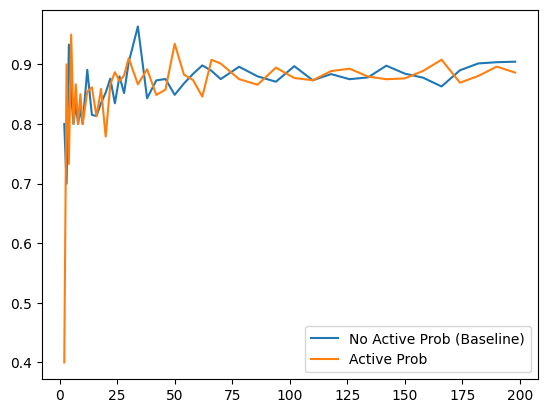

In [24]:
plt.plot(obs_lens_1a, avg_accuracy_1a, label="No Active Prob (Baseline)")
plt.plot(obs_lens_4a, avg_accuracy_4a, label="Active Prob")
plt.legend()